In [1]:
import os
import logging
import sys
logLevel = logging.INFO

logging.basicConfig(
        format='%(asctime)s,%(msecs)d %(levelname)-2s ' +
               '[%(filename)s:%(lineno)d] %(message)s',
datefmt='%Y-%m-%d:%H:%M:%S',
level=logLevel)
logging.info(f"logging set to {logging.getLevelName(logLevel)}")


2021-12-31:19:04:56,831 INFO [732412396.py:11] logging set to INFO


In [2]:
print(os.getcwd())
repo_root = os.path.dirname(os.getcwd())
track_file = os.path.join(repo_root, "src", "TrackConsumer", "track.track")
print(track_file)
if not os.path.isfile(track_file):
    logging.error(f"track_file {track_file} is invalid")
    sys.exit(1)

/home/cmauer/proj/kalmanPy/notebooks
/home/cmauer/proj/kalmanPy/src/TrackConsumer/track.track


In [3]:
class Track:
    def __init__(self, 
                x_pred_pos,
                y_pred_pos,
                z_pred_pos,
                x_vel,
                y_vel,
                z_vel,
                x_true_pos=0.0,
                y_true_pos=0.0,
                z_true_pos=0.0):
        self.x_pred_pos = x_pred_pos
        self.y_pred_pos = y_pred_pos
        self.z_pred_pos = z_pred_pos
        self.x_true_pos = x_true_pos
        self.y_true_pos = y_true_pos
        self.z_true_pos = z_true_pos
        self.x_vel = x_vel
        self.y_vel = y_vel
        self.z_vel = z_vel
    
track_list = []
with open(track_file) as file:
    line = file.readline()
    while line:
        splt_line = line.split()
        if splt_line[0] == 'trk':
            x_pred_pos=splt_line[1]
            y_pred_pos=splt_line[2]
            z_pred_pos=splt_line[3]
            x_velocity=splt_line[4]
            y_velocity=splt_line[5]
            z_velocity=splt_line[6]


            line = file.readline()
            true_pos_x = None
            true_pos_y = None
            true_pos_z = None
            while line:
                splt_meas =  line.split()
                if splt_meas[0] == 'meas':
                    true_pos_x = splt_meas[4]
                    true_pos_y = splt_meas[5]
                    true_pos_z = splt_meas[6]
                    line = file.readline()
                else:
                    break
            if true_pos_x is None:
                logging.error(f"true pos has not been set")
            trk = Track(x_pred_pos,
                        y_pred_pos,
                        z_pred_pos,
                        x_velocity, 
                        y_velocity, 
                        z_velocity,
                        true_pos_x,
                        true_pos_y,
                        true_pos_z)
            track_list.append(trk)

        else:
            line = file.readline()

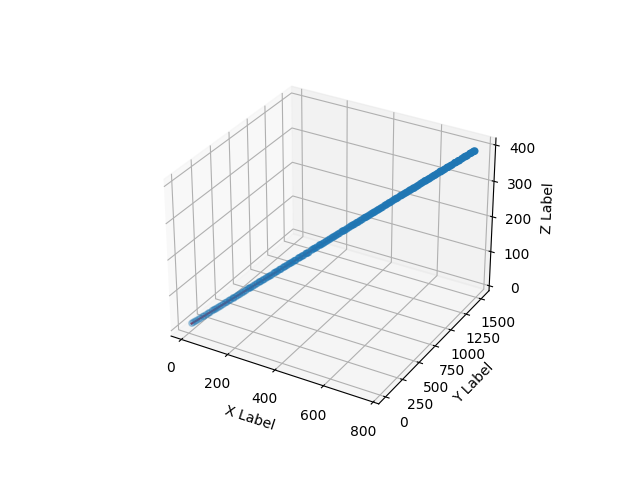

In [4]:
import matplotlib.pyplot as plt
%matplotlib widget

x1 = [] 
y1 = []
z1 = []
x2 = [] 
y2 = []
z2 = []
for track in track_list:
    x1.append(float(track.x_pred_pos))
    y1.append(float(track.y_pred_pos))
    z1.append(float(track.z_pred_pos))
    x2.append(float(track.x_true_pos))
    y2.append(float(track.y_true_pos))
    z2.append(float(track.z_true_pos))
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, y1, z1)
ax.plot(x2, y2, z2,color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

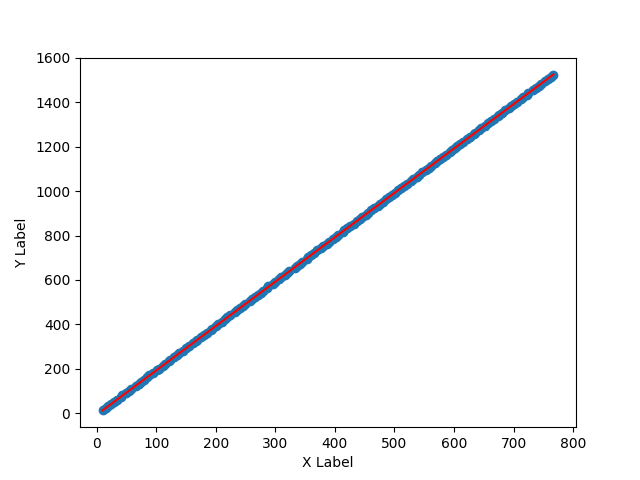

In [5]:

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x1, y1)
ax.plot(x2, y2, color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()